In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
feature=["Timestamp","Score","Name","Meal","State","Gender","WT","Amount","Health_problems","Age","Veg/NonVeg","Food","PaymentMode","Spicy"]
df=pd.read_csv('DataScience_project.csv',names=feature)
print(df.shape)
df.head()

(49, 14)


,Timestamp,Score,Name,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy
0,Timestamp,Score,Name,Meal Type,State,Gender,Waiting Time (approx),Avg Amount paid..,Health Issues(if any),Age,Veg or Non Veg,Food,Payment Method,Spicy..?
1,10/29/2023 21:30:48,NaN,Yerimaku Bhavyatara,Dinner,AP,Female,10 - 20 mins,80,None,20,Veg,"Dosa, Puri, Vada",Digital,NaN
2,10/29/2023 21:31:06,NaN,Vishnu,Breakfast,AP,Male,20 - 30 mins,100,None,21,Non Veg,"Dosa, Puri, Vada",Digital,yes
3,10/29/2023 22:17:50,NaN,Jeela,Dinner,Telangana,.,20 - 30 mins,10000,BP,99,Non Veg,"Dosa, Puri, Vada",Digital,NaN
4,10/29/2023 22:40:00,NaN,Haran Ritvick,Breakfast,AP,Male,10 - 20 mins,100,None,20,Non Veg,"Dosa, Puri, Vada",Digital,NaN


In [3]:
df.dtypes

Timestamp          object
Score              object
Name               object
Meal               object
State              object
Gender             object
WT                 object
Amount             object
Health_problems    object
Age                object
Veg/NonVeg         object
Food               object
PaymentMode        object
Spicy              object
dtype: object

In [4]:
df = df.drop(["Score"],axis=1)
df = df.drop(["Timestamp"],axis=1)
df = df.drop(["Name"],axis=1)
df.head()

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy
0,Meal Type,State,Gender,Waiting Time (approx),Avg Amount paid..,Health Issues(if any),Age,Veg or Non Veg,Food,Payment Method,Spicy..?
1,Dinner,AP,Female,10 - 20 mins,80,None,20,Veg,"Dosa, Puri, Vada",Digital,NaN
2,Breakfast,AP,Male,20 - 30 mins,100,None,21,Non Veg,"Dosa, Puri, Vada",Digital,yes
3,Dinner,Telangana,.,20 - 30 mins,10000,BP,99,Non Veg,"Dosa, Puri, Vada",Digital,NaN
4,Breakfast,AP,Male,10 - 20 mins,100,None,20,Non Veg,"Dosa, Puri, Vada",Digital,NaN


In [5]:
import pandas as pd
import numpy as np

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

bin_edges = [0, 10, 30, 60, 100]
bin_labels = ['Kids', 'Youth', 'Medium', 'Old']

df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)
df.head()

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,Age_Group
0,Meal Type,State,Gender,Waiting Time (approx),Avg Amount paid..,Health Issues(if any),NaN,Veg or Non Veg,Food,Payment Method,Spicy..?,NaN
1,Dinner,AP,Female,10 - 20 mins,80,None,20.0,Veg,"Dosa, Puri, Vada",Digital,NaN,Youth
2,Breakfast,AP,Male,20 - 30 mins,100,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,yes,Youth
3,Dinner,Telangana,.,20 - 30 mins,10000,BP,99.0,Non Veg,"Dosa, Puri, Vada",Digital,NaN,Old
4,Breakfast,AP,Male,10 - 20 mins,100,None,20.0,Non Veg,"Dosa, Puri, Vada",Digital,NaN,Youth


In [6]:
df = df.dropna().reset_index(drop=True)
df['Gender'].values

array(['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', '.', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female'], dtype=object)

In [7]:
#Data-encoding
ordinal_mapping = {'Male': 'M', 'Female': 'F', '.': 'G'}
df['Gender'] = df['Gender'].map(ordinal_mapping)
df.head()

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,Age_Group
0,Breakfast,AP,M,20 - 30 mins,100,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,yes,Youth
1,Breakfast,AP,M,10 - 20 mins,50,None,18.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
2,Breakfast,AP,M,0 - 10 mins,200,None,18.0,Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
3,Lunch,Karnataka,M,10 - 20 mins,90,None,20.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
4,Breakfast,Telangana,M,10 - 20 mins,40,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth


In [8]:
category_mapping = {'20 - 30 mins': 2, '10 - 20 mins': 1, '0 - 10 mins': 0}

# Apply the mapping to create a new integer column
df['WT'] = df['WT'].map(category_mapping)
df.head()

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,Age_Group
0,Breakfast,AP,M,2.0,100,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,yes,Youth
1,Breakfast,AP,M,1.0,50,None,18.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
2,Breakfast,AP,M,0.0,200,None,18.0,Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
3,Lunch,Karnataka,M,1.0,90,None,20.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
4,Breakfast,Telangana,M,1.0,40,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth


In [9]:
df['WT'].value_counts()

1.0    20
2.0    10
0.0     9
Name: WT, dtype: int64

In [10]:
df['State'].value_counts()

AP            21
Telangana      7
Tamil Nadu     6
Karnataka      5
others         1
Name: State, dtype: int64

In [11]:
import pandas as pd

# Perform one-hot encoding
df1 = pd.get_dummies(df, columns=['WT'])

df2 = pd.get_dummies(df1, columns=['Age_Group'])

df3 = pd.get_dummies(df2, columns=['State'])

df4 = pd.get_dummies(df3, columns=['Meal'])
df4.head()

,Gender,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,WT_0.0,WT_1.0,...,Age_Group_Old,State_AP,State_Karnataka,State_Tamil Nadu,State_Telangana,State_others,Meal_Breakfast,Meal_Dinner,Meal_Lunch,Meal_Snacks
0,M,100,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,yes,0,0,...,0,1,0,0,0,0,1,0,0,0
1,M,50,None,18.0,Non Veg,"Dosa, Puri, Vada",Digital,No,0,1,...,0,1,0,0,0,0,1,0,0,0
2,M,200,None,18.0,Veg,"Dosa, Puri, Vada",Digital,Yes,1,0,...,0,1,0,0,0,0,1,0,0,0
3,M,90,None,20.0,Non Veg,"Dosa, Puri, Vada",Digital,No,0,1,...,0,0,1,0,0,0,0,0,1,0
4,M,40,None,21.0,Non Veg,"Dosa, Puri, Vada",Digital,No,0,1,...,0,0,0,0,1,0,1,0,0,0


In [12]:
# Use value_counts() to count the occurrences in the 'Category' column
value_counts = df['Food'].value_counts()

# Create a DataFrame from the value_counts Series
food_df = pd.DataFrame({'Category': value_counts.index, 'Count': value_counts.values})

display(food_df)



,Category,Count
0,"Dosa, Puri, Vada",8
1,"Rice, Sambar, Curry",3
2,Chicken Fried Rice,2
3,"Samosa, Chai",1
4,"Biryani, Mutton Curry, Naan",1
5,"Chapati, Veg Curry, Rice",1
6,"Idli, Chicken Fry",1
7,"Pakora, Tea",1
8,"Chapati, Paneer Curry, Biryani",1
9,"Dosa, Chicken Fry",1


In [13]:
df['Age'] =  df['Age'].astype(int)


In [14]:
df['Health_problems'].unique()

array(['None', 'Sugar, BP, None'], dtype=object)

In [20]:
for i in range(0, len(df)):
    if df.loc[i, 'Health_problems'] == 'Sugar, BP, None':
        df.loc[i, 'Health_problems'] = 'SBP'
    elif df.loc[i, 'Health_problems'] == 'Sugar':
        df.loc[i, 'Health_problems'] = 'S'
    elif df.loc[i, 'Health_problems'] == 'BP':
        df.loc[i, 'Health_problems'] = 'BP' 
# Display the updated DataFrame
display(df)

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,Age_Group
0,Breakfast,AP,M,2.0,100,None,21,Non Veg,"Dosa, Puri, Vada",Digital,yes,Youth
1,Breakfast,AP,M,1.0,50,None,18,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
2,Breakfast,AP,M,0.0,200,None,18,Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
3,Lunch,Karnataka,M,1.0,90,None,20,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
4,Breakfast,Telangana,M,1.0,40,None,21,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
5,Breakfast,AP,M,0.0,100,None,19,Non Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
6,Breakfast,Telangana,F,2.0,100,None,22,Non Veg,"Dosa, Puri, Vada",Digital,No,Youth
7,Breakfast,Telangana,M,0.0,100,None,19,Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
8,Snacks,AP,M,1.0,300,None,20,Non Veg,Chicken Fried Rice,Digital,Yes,Youth
9,Lunch,Tamil Nadu,M,1.0,50,None,20,Veg,"Dosa, Noodles",Digital,No,Youth


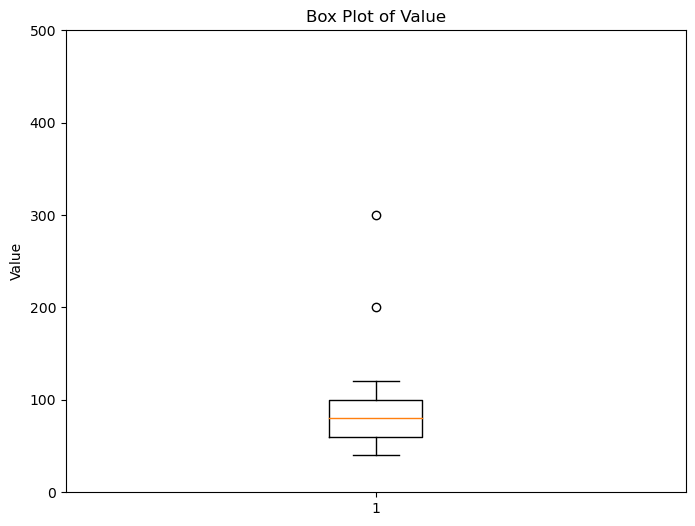

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Amount'] = pd.to_numeric(df['Amount'],)
plt.ylim(0,500)
plt.boxplot(df['Amount'])
plt.title('Box Plot of Value')
plt.ylabel('Value')
plt.show()

In [17]:
import numpy as np
q1 = np.percentile(np.array(df['Amount']),25)
q3 = np.percentile(np.array(df['Amount']),75)

# Calculate IQR
iqr = q3 - q1

# Calculate the lower and upper whiskers
lower_whisker = int(q1 - 1.5 * iqr)
upper_whisker = int(q3 + 1.5 * iqr)

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)

Lower Whisker: 0
Upper Whisker: 160


In [30]:
import pandas as pd

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame(columns=df.columns)

for i in range(0, len(df)):
    if df.loc[i, 'Amount'] < lower_whisker or df.loc[i, 'Amount'] > upper_whisker:
        outliers_df = pd.concat([outliers_df, df.iloc[i:i+1]], ignore_index=True)

# Print the DataFrame containing outliers
display(outliers_df)

,Meal,State,Gender,WT,Amount,Health_problems,Age,Veg/NonVeg,Food,PaymentMode,Spicy,Age_Group
0,Breakfast,AP,M,0.0,200,None,18,Veg,"Dosa, Puri, Vada",Digital,Yes,Youth
1,Snacks,AP,M,1.0,300,None,20,Non Veg,Chicken Fried Rice,Digital,Yes,Youth
2,Snacks,others,G,2.0,1000000,SBP,75,Non Veg,"Dosa, Idli, Puri, Vada, Noodles, Veg Fried Ric...",Cash,No,Old


In [1]:
import pandas as pd


data = {'Amount': [1, 2, 3, None, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)


mean_A = df['Amount'].mean()
df['Amount'].fillna(mean_A, inplace=True)

# Replace missing values in column B with the mean of column B
mean_B = df['B'].mean()
df['B'].fillna(mean_B, inplace=True)

# The missing values have been replaced with the respective means
print(df)


   Amount    B
0    1.00  3.5
1    2.00  2.0
2    3.00  3.0
3    2.75  4.0
4    5.00  5.0


In [2]:
import pandas as pd

# Create a sample DataFrame with missing values
data = {'A': [1, 2, 3, None, 5, 3, None],
        'B': [None, 2, 3, 4, 5, 4, 3]}
df = pd.DataFrame(data)

# Replace missing values in column A with the mode of column A
mode_A = df['payemt_mode'].mode()[0]  
df['payment_mode'].fillna(mode_A, inplace=True)

# Replace missing values in column B with the mode of column B
mode_B = df['B'].mode()[0]
df['B'].fillna(mode_B, inplace=True)

# The missing values have been replaced with the respective modes
print(df)

     A    B
0  1.0  3.0
1  2.0  2.0
2  3.0  3.0
3  3.0  4.0
4  5.0  5.0
5  3.0  4.0
6  3.0  3.0


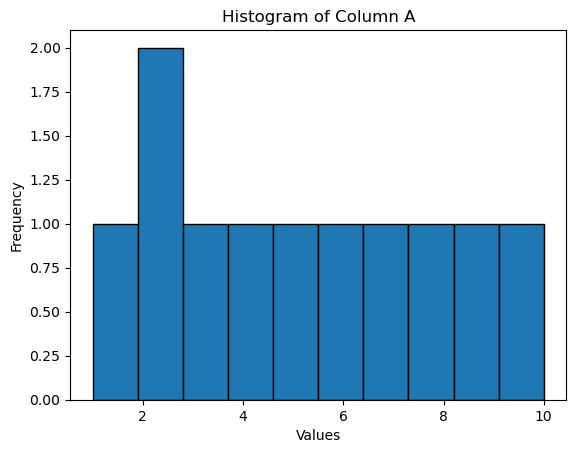

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with a numeric column
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,2]}
df = pd.DataFrame(data)

# Create a histogram for column 'A'
plt.hist(df['A'], bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column A')
plt.show()





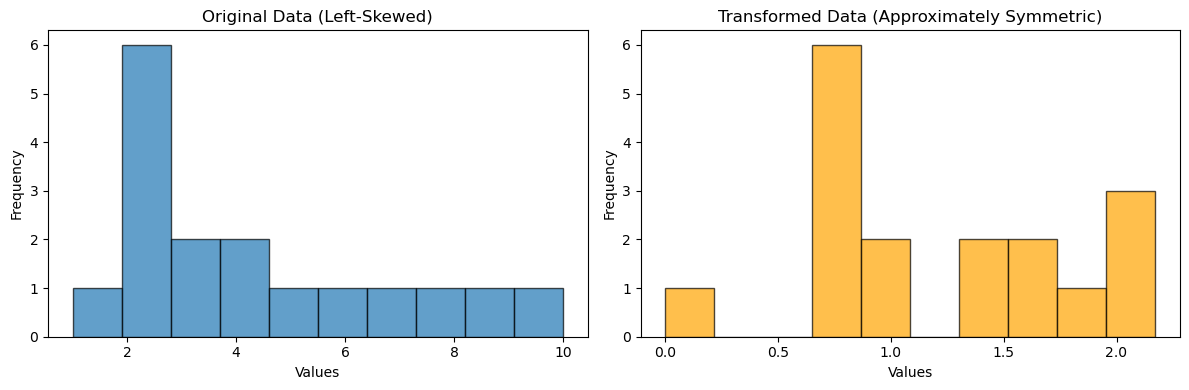

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Original data (left-skewed)
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,2,2,2,2,3,2.4,4,]

# Plot a histogram of the original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data, bins=10, edgecolor='k', alpha=0.7)
plt.title("Original Data (Left-Skewed)")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Apply the Box-Cox transformation
transformed_data, lambda_best_fit = stats.boxcox(data)

# Plot a histogram of the transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=10, edgecolor='k', alpha=0.7, color='orange')
plt.title("Transformed Data (Approximately Symmetric)")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show both histograms
plt.tight_layout()
plt.show()
